In [ ]:
!python3 -m pip install scikit-fuzzy

In [ ]:
import skfuzzy as fuzz
import skfuzzy.control as sys
import numpy as np

# setpoint = 50
#e = setpoint - np.arange(0, 300, 0.1) # controle inverso

tolerancia = 2  # cm
emax, emin = 120, -100
e = np.arange(-100, 120, 0.1)

erro = sys.Antecedent(e, 'erro')  # entrada
potencia = sys.Consequent(np.arange(0, 100, 0.1), 'potencia')  # saida

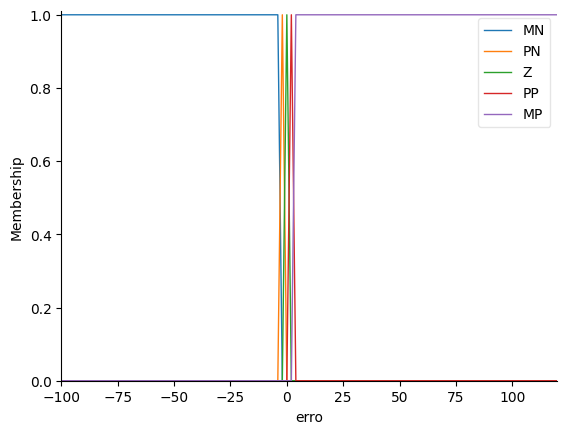

In [ ]:
# Funções de pertinência dos conjuntos da entrada

erro['MN'] = fuzz.trapmf(erro.universe, [emin, emin, -2 * tolerancia, -tolerancia])
erro['PN'] = fuzz.trimf(erro.universe, [-2*tolerancia, -tolerancia, 0])
erro['Z'] = fuzz.trimf(erro.universe, [-tolerancia, 0, tolerancia])
erro['PP'] = fuzz.trimf(erro.universe, [0, tolerancia, 2 * tolerancia])
erro['MP'] = fuzz.trapmf(erro.universe, [tolerancia, 2 * tolerancia, emax, emax])

erro.view()

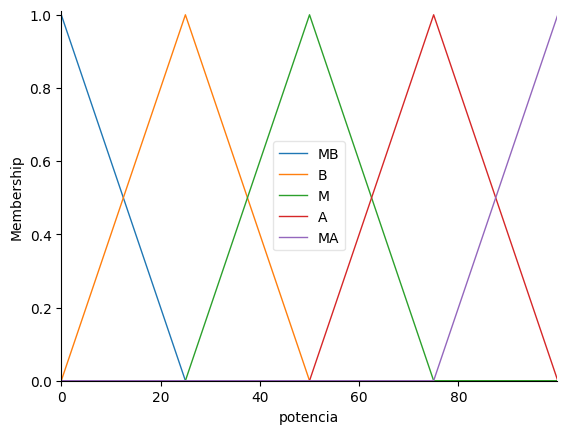

In [ ]:
# Funções de pertinência dos conjuntos da saída

potencia['MB'] = fuzz.trimf(potencia.universe, [0, 0, 25])
potencia['B'] = fuzz.trimf(potencia.universe, [0, 25, 50])
potencia['M'] = fuzz.trimf(potencia.universe, [25, 50, 75])
potencia['A'] = fuzz.trimf(potencia.universe, [50, 75, 100])
potencia['MA'] = fuzz.trimf(potencia.universe, [75, 100, 100])

potencia.view()

In [ ]:
# Base de regras

r1 = sys.Rule(erro['MN'], potencia['MB'])
r2 = sys.Rule(erro['PN'], potencia['B'])
r3 = sys.Rule(erro['Z'], potencia['M'])
r4 = sys.Rule(erro['PP'], potencia['A'])
r5 = sys.Rule(erro['MP'], potencia['MA'])

In [ ]:
regras = sys.ControlSystem([r1, r2, r3, r4, r5])
controlador = sys.ControlSystemSimulation(regras)

for d in [1.3, 0.7]:
  controlador.input['erro'] = d
  controlador.compute()
  p = controlador.output['potencia']
  print(p)

65.55475467361411
59.44475739460526
